In [129]:
import numpy as np
from os.path import dirname, join as pjoin
import scipy.io as sio
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as patches
import math

source_mat = ''
#=r"C:\Users\108652706\Documents\DOCUMENT_perso\ISI\MLA\trials\gaze360"
mat_fname = pjoin(source_mat, 'metadata.mat')
mat_contents = sio.loadmat(mat_fname)
sorted(mat_contents.keys())

['__globals__',
 '__header__',
 '__version__',
 'frame',
 'gaze_dir',
 'person_body_bbox',
 'person_cam',
 'person_eye_left_bbox',
 'person_eye_right_bbox',
 'person_eyes2d',
 'person_eyes3d',
 'person_face_bbox',
 'person_head_bbox',
 'person_identity',
 'recording',
 'recordings',
 'split',
 'splits',
 'target_cam',
 'target_pos2d',
 'target_pos3d',
 'ts']

In [130]:
#name= mat_contents['']

recordings=mat_contents['recordings']
recording = mat_contents['recording']
person_identity= mat_contents['person_identity']
frame= mat_contents['frame']
person_head_bbox = mat_contents['person_head_bbox']
person_eye_left_bbox= mat_contents['person_eye_left_bbox']
cropType= 'head'
person_face_bbox = mat_contents['person_face_bbox']
target_pos3d=mat_contents['target_pos3d']
person_eye_right_bbox= mat_contents['person_eye_right_bbox']

In [ ]:
"""
source_p= r"C:\Users\108652706\Documents\DOCUMENT_perso\ISI\MLA\trials\gaze360\imgs"
imHead = cv2.imread(os.path.join(
    source_p,
    recordings[0,recording[0,i]][0],
    cropType,
    '%06d' % person_identity[0,i],
    '%06d.jpg' % frame[0,i]
    ))
"""

In [131]:
i=
source_p='head.png'
imHead = cv2.imread(source_p)

cropSizePx = [imHead.shape[1], imHead.shape[0]]

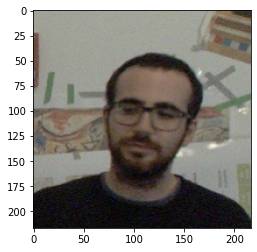

In [7]:
plt.imshow(imHead)

In [132]:
#left eye
if np.all(person_eye_left_bbox[i,:]==np.array([-1,-1,-1,-1])):
    print("left_eye_not_detected")
    key_l=0
else: 
    headBBInFull = person_head_bbox[i,:]
    eyeBBInFull = person_eye_left_bbox[i,:]
    eyeBBInCrop = [
        (eyeBBInFull[0] - headBBInFull[0]) / headBBInFull[2], # subtract offset of the crop
        (eyeBBInFull[1] - headBBInFull[1]) / headBBInFull[3], 
        eyeBBInFull[2] / headBBInFull[2], # scale to smaller space of the crop
        eyeBBInFull[3] / headBBInFull[3], 
        ]
    eyeBBInCropPx_l = np.concatenate([np.multiply(eyeBBInCrop[:2], cropSizePx), np.multiply(eyeBBInCrop[2:], cropSizePx)]).astype(int)
    imEye_l = imHead[
        eyeBBInCropPx_l[1]:(eyeBBInCropPx_l[1]+eyeBBInCropPx_l[3]), 
        eyeBBInCropPx_l[0]:(eyeBBInCropPx_l[0]+eyeBBInCropPx_l[2]),
        :]
    fl= imEye_l.flatten()
    key_l=1
   

In [133]:
fl.shape

(768,)

In [111]:
#right eye
if np.all(person_eye_right_bbox[i,:]==np.array([-1,-1,-1,-1])):
    print("right_eye_not_detected")
    fl,fr= bulat_al(imHead,fa)
    key_r=0
else: 
    headBBInFull = person_head_bbox[i,:]
    eyeBBInFull = person_eye_right_bbox[i,:]
    eyeBBInCrop = [
        (eyeBBInFull[0] - headBBInFull[0]) / headBBInFull[2], # subtract offset of the crop
        (eyeBBInFull[1] - headBBInFull[1]) / headBBInFull[3], 
        eyeBBInFull[2] / headBBInFull[2], # scale to smaller space of the crop
        eyeBBInFull[3] / headBBInFull[3], 
        ]
    eyeBBInCropPx_r = np.concatenate([np.multiply(eyeBBInCrop[:2], cropSizePx), np.multiply(eyeBBInCrop[2:], cropSizePx)]).astype(int)
    imEye_r = imHead[
        eyeBBInCropPx_r[1]:(eyeBBInCropPx_r[1]+eyeBBInCropPx_r[3]), 
        eyeBBInCropPx_r[0]:(eyeBBInCropPx_r[0]+eyeBBInCropPx_r[2]),
        :]
    fr= imEye_r.flatten()
    key_r=1
    

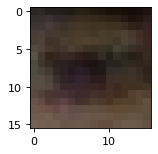

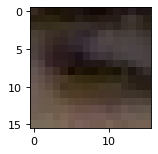

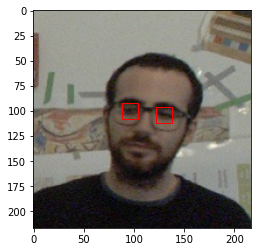

In [10]:
figure(figsize=(2,2), dpi=80)
plt.imshow(imEye_r)

figure(figsize=(2,2), dpi=80)
plt.imshow(imEye_l)
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(imHead)

# Create a Rectangle patch
rect = patches.Rectangle([eyeBBInCropPx_l[0],eyeBBInCropPx_l[1]],eyeBBInCropPx_l[2],eyeBBInCropPx_l[3], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# Create a Rectangle patch
rect = patches.Rectangle([eyeBBInCropPx_r[0],eyeBBInCropPx_r[1]],eyeBBInCropPx_r[2],eyeBBInCropPx_r[3], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

In [ ]:
target_pos3d[i]

array([ 1.68868502,  1.76575734, -0.62507184])

In [11]:
from math import *
x,y,z=target_pos3d[i]
yaw = atan(np.divide(z,x))*180
pitch=atan(np.divide(x,y))*180
h=(yaw,pitch)
input_d = np.array([h,key_r*key_l*(np.append(fl,fr)/255)],dtype=object)

In [12]:
input_d = np.array([h,key_r*key_l*(np.append(fl,fr)/255)],dtype=object)

In [14]:
!pip install face_alignment

  Created wheel for face-alignment: filename=face_alignment-1.3.5-py2.py3-none-any.whl size=28239 sha256=cfd65bf7f9148b75e1dc34779c50bed957da16f50cdb97c4115ca4d2735223f0
  Stored in directory: /root/.cache/pip/wheels/c9/ba/4d/2d368f55e5f929f9472da59e356fbdf1483f885de80a5bc620
Successfully built face-alignment


In [21]:
import face_alignment
from skimage import io
from mpl_toolkits.mplot3d import Axes3D
#from skimage import io
import collections
# Optionally set detector and some additional detector parameters
face_detector = 'sfd'
face_detector_kwargs = {
    "filter_threshold" : 0.8
}

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True,
                                  face_detector=face_detector, face_detector_kwargs=face_detector_kwargs)
#fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu')
preds = fa.get_landmarks(imHead)[-1]

(-0.5, 216.5, 216.5, -0.5)

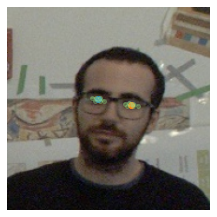

In [50]:
# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              }
centers=[]
Avr_eye=24
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(imHead)

for pred_type in pred_types.values():
    x=preds[pred_type.slice, 0]
    y=preds[pred_type.slice, 1]
    ax.plot(x,             y,
            color=pred_type.color, **plot_style)
    centroid = (sum(x) / len(x), sum(y) / len(y))
    ax.scatter(centroid[0],centroid[1])
    centers.append(centroid)
ax.axis('off')


In [105]:
dist = math.hypot(centers[0][0]-centers[1][0],centers[0][1]-centers[1][1])
dist_reel= np.divide(dist*24,x.max()-x.min() )
if (77 >dist_reel>51): 
    imEye_r=imHead[centers[0][0]-7:centers[0][0]+7,centers[0][1]-7:centers[0][1]+7,:]
    imEye_l=imHead[centers[1][0]-7:centers[1][0]+7,centers[1][1]-7:centers[1][1]+7,:]
    fl= imEye_l.flatten()
    fr= imEye_r.flatten()


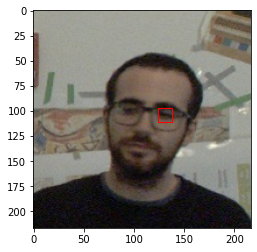

In [94]:
rect= [centers[0][0]-7,centers[0][1]-7]
fig, ax = plt.subplots()

# Display the image
ax.imshow(imHead)

# Create a Rectangle patch
rect = patches.Rectangle([centers[1][0]-7,centers[1][1]-7],14,14, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#create functions

In [156]:
#first check 
def  Kellnhofer_al_eye(imHead,headBBInFull,eyeBBInFull): 
        cropSizePx = [imHead.shape[1], imHead.shape[0]]
        #eyeBBInFull = person_eye_left_bbox[i,:]
        eyeBBInCrop = [
            (eyeBBInFull[0] - headBBInFull[0]) / headBBInFull[2], # subtract offset of the crop
            (eyeBBInFull[1] - headBBInFull[1]) / headBBInFull[3], 
            eyeBBInFull[2] / headBBInFull[2], # scale to smaller space of the crop
            eyeBBInFull[3] / headBBInFull[3], 
            ]
        eyeBBInCropPx_l = np.concatenate([np.multiply(eyeBBInCrop[:2], cropSizePx), np.multiply(eyeBBInCrop[2:], cropSizePx)]).astype(int)
        imEye_l = imHead[
            eyeBBInCropPx_l[1]:(eyeBBInCropPx_l[1]+eyeBBInCropPx_l[3]), 
            eyeBBInCropPx_l[0]:(eyeBBInCropPx_l[0]+eyeBBInCropPx_l[2]),
            :]
        fl= imEye_l.flatten()
        return fl

In [168]:
def Kellnhofer_al_eyes(imHead,head_box,eye_left_box,eye_right_box):
    if np.all(eye_left_box==np.array([-1,-1,-1,-1])):
        fl=np.zeros(588)
    else:
        fl = Kellnhofer_al_eye(imHead,head_box,eye_left_box)

    if np.all(eye_right_box==np.array([-1,-1,-1,-1])):
        fr=np.zeros(588) 
    else:
        fr = Kellnhofer_al_eye(imHead,person_head_bbox[i,:],eye_right_box)
    return fl,fr

In [112]:
def bulat_al(imHead,fa):#second check
    preds = fa.get_landmarks(imHead)[-1]#predict
    # 2D-Plot
    pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
    pred_types = {
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              }
    centers=[]
    Avr_eye=24 #24 represents average eye length for adults, we use this to set the scale

    for pred_type in pred_types.values():
        x=preds[pred_type.slice, 0]
        y=preds[pred_type.slice, 1]
        centroid = (sum(x) / len(x), sum(y) / len(y)) #get centroid
        centers.append(centroid) #append
    dist = math.hypot(centers[0][0]-centers[1][0],centers[0][1]-centers[1][1]) #distance on image
    dist_reel= np.divide(dist*24,x.max()-x.min() )#real distance
    if (77 >dist_reel>51):  #normal distance between pupils is between 51 and 77
        centers = [(int(element[0]), int(element[1])) for element in centers]
        imEye_r=imHead[centers[0][0]-7:centers[0][0]+7,centers[0][1]-7:centers[0][1]+7,:]
        imEye_l=imHead[centers[1][0]-7:centers[1][0]+7,centers[1][1]-7:centers[1][1]+7,:]
        fl= imEye_l.flatten()
        fr= imEye_r.flatten()
    else :
        fl = np.zeros(588)
        fr = np.zeros(588)
    return fl,fr


In [174]:
imHead = cv2.imread(source_p)
#cropSizePx = [imHead.shape[1], imHead.shape[0]]
def head_eye_extractors(imHead,head_box)
if np.all(person_eye_right_bbox[i,:]==np.array([-1,-1,-1,-1])) and np.all(person_eye_left_bbox[i,:]==np.array([-1,-1,-1,-1])):
    print("eye_not_detected with Kellnhofer_al ")
    fl,fr= bulat_al(imHead,fa)
else: 
    fl,fr= Kellnhofer_al_eyes(imHead,person_head_bbox[i,:],person_eye_left_bbox[i,:],person_eye_right_bbox[i,:])
x,y,z=target_pos3d[i]
yaw = atan(np.divide(z,x))*180
pitch=atan(np.divide(x,y))*180
h=(yaw,pitch)
input_d = np.array([h,(np.append(fl,fr)/255)],dtype=object)

In [180]:
def head_eye_extractors(imHead,fa,head_box,target,eye_left_box,eye_right_box):
      if np.all(eye_left_box==np.array([-1,-1,-1,-1])) and np.all(eye_right_box==np.array([-1,-1,-1,-1])):
          print("eye_not_detected with Kellnhofer_al ")
          fl,fr= bulat_al(imHead,fa)
      else: 
          fl,fr= Kellnhofer_al_eyes(imHead,head_box,eye_left_box,eye_right_box)
      x,y,z=target
      yaw = atan(np.divide(z,x))*180
      pitch=atan(np.divide(x,y))*180
      h=(yaw,pitch)
      input_d = np.array([h,(np.append(fl,fr)/255)],dtype=object)
      return input_d

In [182]:
input_i= head_eye_extractors(imHead,fa,person_head_bbox[i,:],target_pos3d[i],person_eye_left_bbox[i,:],person_eye_right_bbox[i,:])

In [184]:
input_i

array([(-63.81260964785119, 137.35634214207383),
       array([0.21568627, 0.16470588, 0.12941176, ..., 0.38823529, 0.32941176,
       0.27058824])], dtype=object)

In [185]:
for loop to do all dataset to be implemented 

array([(-63.81260964785119, 137.35634214207383),
       array([0.21568627, 0.16470588, 0.12941176, ..., 0.38823529, 0.32941176,
       0.27058824])], dtype=object)

Anthropometric databases are available that include IPD.[13][14] These include the US Department of Defense's Military Handbook 743A and the 2012 Anthropometric Survey of US Army Personnel. The dataset contains many inforation, gender, max,min, mean,squared error... we take the global min-max to compare our distance with.